# Writing Efficient Code: A Practical Exploration

In this notebook, we'll explore strategies for writing more efficient Python code. Our focus is not just on making code work, but on making it work well. We'll use the Jupyter magic command `%%timeit` to compare the performance of different code blocks and measure execution time in a meaningful way.

By examining the speed and efficiency of various coding approaches, you’ll gain a deeper understanding of how small changes in syntax or structure can lead to significant performance improvements. Especially when working with large data sets or in production environments.

Adopting best practices early helps prevent the need to refactor or rewrite inefficient code later. That said, it's important to strike a healthy balance: while efficiency matters, it's just one part of good development. Readability, maintainability, and your ability to iterate quickly are just as important. Our goal here is to build awareness around performance while still keeping development practical and productive.

## Simple Net Salary Calculator

In this section, we’ll build a basic net salary calculator. We’ll do it a few different ways to explore how small changes in code structure can dramatically impact performance and efficiency.

We’ll walk through the process in three steps:

- Start with simple one-liner expressions
    - We'll begin with straightforward calculations written directly in code cells.

- Refactor into a basic function
    - Next, we’ll wrap our logic in a function to improve reusability and readability.

- Refine the function for better performance and clarity
    - Finally, we’ll enhance the function by applying best practices to make it more efficient, maintainable, and scalable.

By comparing these versions, you’ll gain insight into how code organization affects performance and why writing clean, optimized functions matters, even for simple tasks.

## simple one-liner expressions

This is often how we begin exploring the logic behind a task—by quickly writing out one-liner expressions to test and understand how the code should work.

In [47]:
base_salary = 50000
bonus = 10000
tax_rate = 0.2

gross_salary = base_salary + bonus
tax = gross_salary * tax_rate
net_salary = gross_salary - tax

print(f"The net salary is: {net_salary}")

The net salary is: 48000.0


## Refactor into a basic function

Once we’ve figured out the logic using simple expressions, the next step is to wrap that logic into a function. This makes our code more reusable, easier to read, and more maintainable.

Below is a basic function that calculates net salary using predefined values:

In [48]:
base_salary = 50000
bonus = 10000
tax_rate = 0.2


def calculate_net_salary():
    gross_salary = base_salary + bonus
    tax = gross_salary * tax_rate
    net_salary = gross_salary - tax
    return net_salary


net_salary = calculate_net_salary()
print(f"The net salary is: {net_salary}")

The net salary is: 48000.0


## Refined function

Now that we’ve structured our logic into a function, we can improve it further by making it more flexible. Instead of relying on hardcoded variables from the outer scope, this version takes in parameters—allowing us to reuse the function with different inputs.

We’ve also added type hints to make the function more readable and to help with error checking and documentation.

In [49]:
def calculate_net_salary(base_salary: float, bonus: float, tax_rate: float):
    gross_salary = base_salary + bonus
    tax = gross_salary * tax_rate
    net_salary = gross_salary - tax
    return net_salary


net_salary = calculate_net_salary(50000, 10000, .2)
print(f"The net salary is: {net_salary}")

The net salary is: 48000.0


## Converted into a class

In [50]:
class SalaryCalculator:
    def __init__(self, base_salary: float, bonus: float, tax_rate: float):
        self.base_salary = base_salary
        self.bonus = bonus
        self.tax_rate = tax_rate

    def calculate_net_salary(self) -> float:
        gross_salary = self.base_salary + self.bonus
        tax = gross_salary * self.tax_rate
        net_salary = gross_salary - tax
        return net_salary

# Example usage
calculator = SalaryCalculator(50000, 10000, 0.2)
net_salary = calculator.calculate_net_salary()
print(f"The net salary is: {net_salary}")

The net salary is: 48000.0


Now lets test them with %%timeit to see how each change effected the performance of the code.

## %%timeit

#### what is this %%timeit all about anyways?
- The %%timeit magic command in Jupyter is used to measure the execution time of a code block.

#### `%%timeit -r 20 -n 10` -> What It Means:
- -n 10 (number):
    - Run the code 10 times per loop. This is the number of executions per repetition.

- -r 20 (repeat):
    - Repeat the loop 20 times. This means the set of 10 executions will be done 20 times, and the best average time (usually) is reported.

#### In total:
- Your code runs 10 × 20 = 200 times.
- Each group of 10 runs is timed and averaged.
- You get 20 such averages

The final result shows the mean (or best) time of those 20 averaged runs.

#### Why use these flags?
- -n: Controls how many times the code is executed in one timing loop. More runs = smoother timing.



In [51]:
%%timeit -r 20 -n 10

base_salary = 50000
bonus = 10000
tax_rate = 0.2

gross_salary = base_salary + bonus
tax = gross_salary * tax_rate
net_salary = gross_salary - tax

# print(f"The net salary is: {net_salary}")

78.7 ns ± 31.4 ns per loop (mean ± std. dev. of 20 runs, 10 loops each)


In [52]:
%%timeit -r 20 -n 10

base_salary = 50000
bonus = 10000
tax_rate = 0.2


def calculate_net_salary():
    gross_salary = base_salary + bonus
    tax = gross_salary * tax_rate
    net_salary = gross_salary - tax
    return net_salary


net_salary = calculate_net_salary()
# print(f"The net salary is: {net_salary}")

The slowest run took 23.64 times longer than the fastest. This could mean that an intermediate result is being cached.
514 ns ± 808 ns per loop (mean ± std. dev. of 20 runs, 10 loops each)


In [53]:
%%timeit -r 20 -n 10

def calculate_net_salary(base_salary: float, bonus: float, tax_rate: float):
    gross_salary = base_salary + bonus
    tax = gross_salary * tax_rate
    net_salary = gross_salary - tax
    return net_salary


net_salary = calculate_net_salary(50000, 10000, .2)
# print(f"The net salary is: {net_salary}")

320 ns ± 76.1 ns per loop (mean ± std. dev. of 20 runs, 10 loops each)


In [54]:
%%timeit -r 20 -n 10

class SalaryCalculator:
    def __init__(self, base_salary: float, bonus: float, tax_rate: float):
        self.base_salary = base_salary
        self.bonus = bonus
        self.tax_rate = tax_rate

    def calculate_net_salary(self) -> float:
        gross_salary = self.base_salary + self.bonus
        tax = gross_salary * self.tax_rate
        net_salary = gross_salary - tax
        return net_salary


calculator = SalaryCalculator(50000, 10000, 0.2)
net_salary = calculator.calculate_net_salary()
# print(f"The net salary is: {net_salary}")

9.34 μs ± 1.29 μs per loop (mean ± std. dev. of 20 runs, 10 loops each)


## Formula for conversion

formula to convert Microseconds (μs) → Seconds (s)

Mean time:

$$
10.4\,\mu s = \frac{10.4}{1{,}000{,}000} = 0.0000104 \text{ seconds}
$$

## Why These Tiny Differences Matter
At first glance, a time like 10.4 microseconds (μs) may seem insignificant and for a single operation, it is. But the goal here is not to obsess over micro-optimizations.

Instead, this example is meant to demonstrate how even small improvements in code efficiency can scale up to major time savings, especially in real-world projects involving:

- Large datasets (millions of rows)
- Complex operations (e.g., joins, aggregations, model training)
- High-frequency computations (inside loops, APIs, or batch jobs)

For instance, if you're processing data row-by-row in a dataset with 10 million records, saving even 10 microseconds per row translates to a total savings of over 100 seconds.

So while this is a simplified example, it shows how important it is to:

- Understand performance trade-offs
- Build efficient habits early
- Recognize when optimizations are worth the effort

### Function That converts time to seconds

In [55]:
def extract_mean_seconds(timeit_str):
    """
    Extracts the mean time from a timeit output string like
    '10.4 μs ± 7.22 μs per loop' and returns it in seconds.
    """
    import re

    match = re.search(r'([\d.]+)\s*μs', timeit_str)
    if not match:
        raise ValueError("Input string not in expected format.")

    mean_us = float(match.group(1))
    return mean_us / 1_000_000


In [56]:
single_line_result = "10.4 μs ± 7.22 μs per loop"
slr = extract_mean_seconds(single_line_result)
print(f"Single Line Mean time: {slr:.8f} seconds")

base_fun = "8.28 μs ± 2.44 μs per loop"
bf = extract_mean_seconds(base_fun)
print(f"Basic Function Mean time: {bf:.8f} seconds")

refined_fun = "7.67 μs ± 2.88 μs per loop"
rf = extract_mean_seconds(refined_fun)
print(f"Refined Function Mean time: {rf:.8f} seconds")

class_test = "19.5 μs ± 9.16 μs per loop"
ct = extract_mean_seconds(class_test)
print(f"Class Mean time: {ct:.8f} seconds")

Single Line Mean time: 0.00001040 seconds
Basic Function Mean time: 0.00000828 seconds
Refined Function Mean time: 0.00000767 seconds
Class Mean time: 0.00001950 seconds


### Plotting our findings

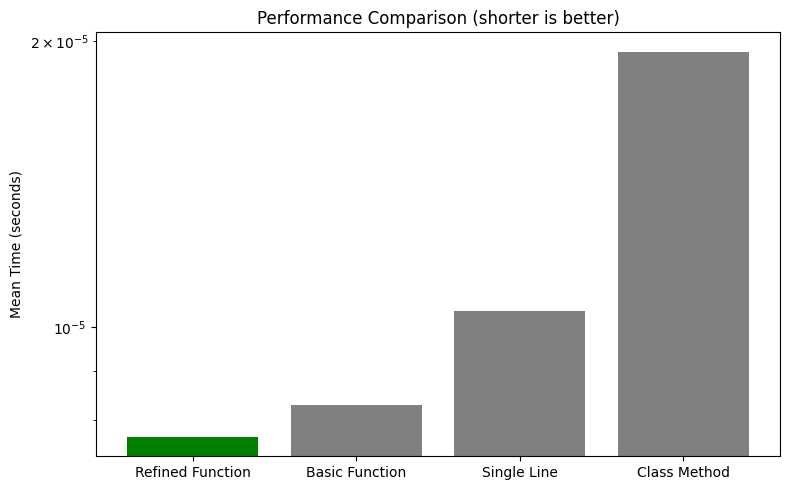

In [57]:
import matplotlib.pyplot as plt

implementations = [
    'Refined Function',
    'Basic Function',
    'Single Line',
    'Class Method'
]

mean_times = [
    0.00000767,  # Refined Function
    0.00000828,  # Basic Function
    0.00001040,  # Single Line
    0.00001950   # Class Method
]

sorted_data = sorted(zip(implementations, mean_times), key=lambda x: x[1])
labels, times = zip(*sorted_data)

colors = ['green'] + ['grey'] * (len(times) - 1)

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, times, color=colors)

plt.ylabel('Mean Time (seconds)')
plt.title('Performance Comparison (shorter is better)')
plt.yscale('log')  

plt.tight_layout()
plt.show()

# Performance Comparison: Different Net Salary Implementations

| Implementation       | Mean Time (seconds) | Relative Speed vs. Single Line | Relative Speed vs. Class      |
|----------------------|---------------------|-------------------------------|------------------------------|
| Single Line          | 0.00001040          | 1.00× (baseline)               | ~1.88× faster                 |
| Basic Function       | 0.00000828          | ~1.26× faster                  | ~2.36× faster                 |
| Refined Function     | 0.00000767          | ~1.36× faster                  | ~2.54× faster                 |
| Class Method         | 0.00001950          | ~1.87× slower                  | 1.00× (baseline)             |

---

## Explanation

- **Single Line Code**  
  Simple and quick to write; good for quick tests or very small scripts. However, it's not reusable or scalable and can quickly get messy in larger projects.

- **Basic Function**  
  Introduces reusability and clearer structure. It’s faster than the single line version here because function calls help organize the code better without much overhead.

- **Refined Function**  
  Improves readability and flexibility by accepting parameters and using type hints. This is the fastest approach among these and ideal for most cases where performance and clarity matter.

- **Class Method**  
  While slower (about 87% slower than single-line code in this test), classes provide a powerful way to encapsulate data and related behavior. This is invaluable for complex systems where you want to:

  - Group related attributes and methods logically.
  - Support extensions like adding benefits, deductions, or different tax rules.
  - Maintain and test code more effectively in large projects.

---

## When to Use Which?

| Use Case                          | Recommended Implementation                      |
|----------------------------------|------------------------------------------------|
| Quick one-off calculations        | Single line or Basic Function                   |
| Reusable, parameterized logic    | Refined Function                                |
| Complex systems with multiple related operations and state | Class Method                                  |

---

### Why Use Classes Even Though They Are Slower?

- **Maintainability & Organization:** Classes help keep your code modular and easier to maintain as projects grow.
- **Extensibility:** You can add new features (e.g., different salary components, tax rules) without rewriting core logic.
- **Real-world Applications:** Most large codebases rely heavily on OOP for its clear structure despite minor performance costs.

In most practical scenarios, the performance cost of classes is negligible compared to the benefits they provide.

